<a href="https://colab.research.google.com/github/sneharreddy25/project_2025/blob/main/Language_Detection_project_Using_NLProcessing.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Language Detection project Using Natural Language Processing

In [3]:
import pandas as pd
import numpy as np
import re
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.simplefilter("ignore")

data = pd.read_csv("Language Detection.csv")
print(data.head(10))

                                                Text Language
0   Nature, in the broadest sense, is the natural...  English
1  "Nature" can refer to the phenomena of the phy...  English
2  The study of nature is a large, if not the onl...  English
3  Although humans are part of nature, human acti...  English
4  [1] The word nature is borrowed from the Old F...  English
5  [2] In ancient philosophy, natura is mostly us...  English
6  [3][4] \nThe concept of nature as a whole, the...  English
7  During the advent of modern scientific method ...  English
8  [5][6] With the Industrial revolution, nature ...  English
9  However, a vitalist vision of nature, closer t...  English


In [4]:
X = data["Text"]
y = data["Language"]

In [5]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
y = le.fit_transform(y)

In [6]:
# creating a list for appending the preprocessed text
data_list = []
# iterating through all the text
for text in X:
       # removing the symbols and numbers
        text = re.sub(r'[!@#$(),n"%^*?:;~`0-9]', ' ', text)
        text = re.sub(r'[[]]', ' ', text)
        # converting the text to lower case
        text = text.lower()
        # appending to data_list
        data_list.append(text)

In [7]:
from sklearn.feature_extraction.text import CountVectorizer
cv = CountVectorizer()
X = cv.fit_transform(data_list).toarray()
X.shape # (10337, 39419)

(10337, 34937)

In [8]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size = 0.20)

In [9]:
from sklearn.naive_bayes import MultinomialNB
model = MultinomialNB()
model.fit(x_train, y_train)

MultinomialNB()

In [10]:
y_pred = model.predict(x_test)

In [11]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
ac = accuracy_score(y_test, y_pred)
cm = confusion_matrix(y_test, y_pred)

print("Accuracy is :",ac)
# Accuracy is : 0.9772727272727273

Accuracy is : 0.9763056092843327


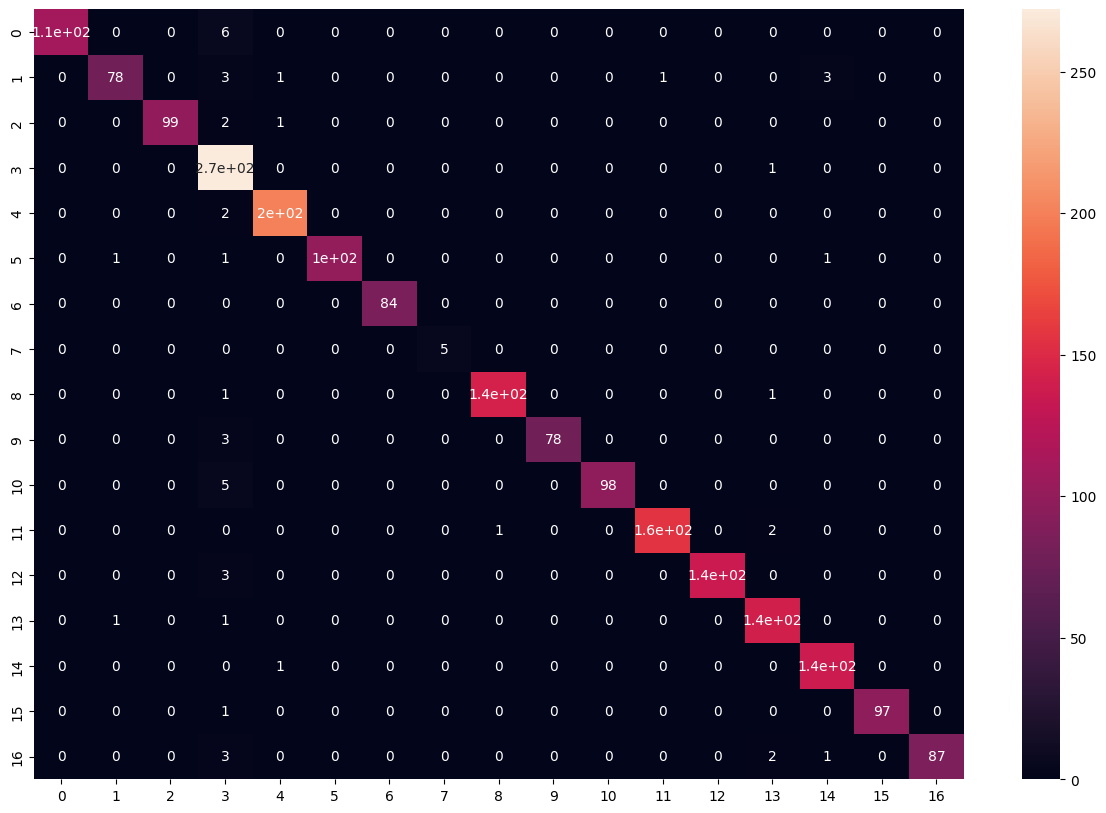

In [12]:
plt.figure(figsize=(15,10))
sns.heatmap(cm, annot = True)
plt.show()

#Predicting with some more data

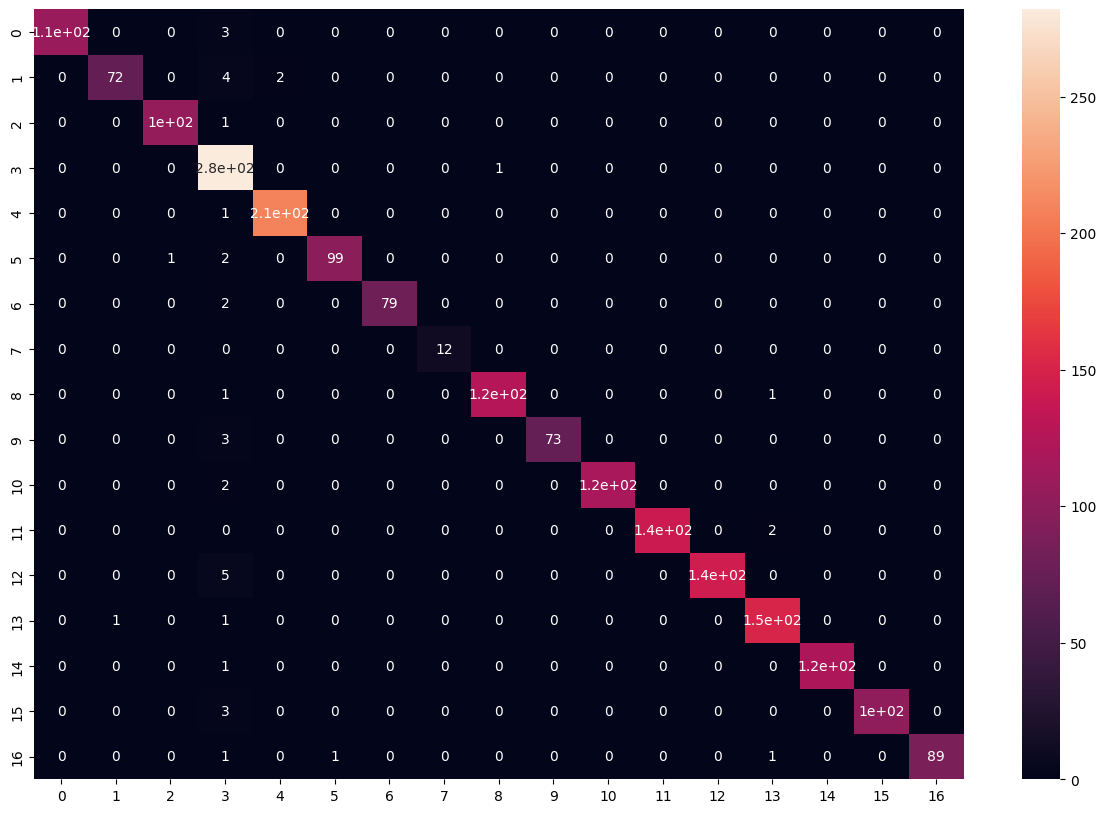

The langauge is in English
The langauge is in French
The langauge is in Arabic
The langauge is in Spanish
The langauge is in Malayalam
The langauge is in Russian


In [17]:
import pandas as pd
import numpy as np
import re
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.simplefilter("ignore")
# Loading the dataset
data = pd.read_csv("Language Detection.csv")
# value count for each language
data["Language"].value_counts()
# separating the independent and dependant features
X = data["Text"]
y = data["Language"]
# converting categorical variables to numerical
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
y = le.fit_transform(y)
# creating a list for appending the preprocessed text
data_list = []
# iterating through all the text
for text in X:
    # removing the symbols and numbers
    text = re.sub(r'[!@#$(),n"%^*?:;~`0-9]', ' ', text)
    text = re.sub(r'[[]]', ' ', text)
    # converting the text to lower case
    text = text.lower()
    # appending to data_list
    data_list.append(text)
# creating bag of words using countvectorizer
from sklearn.feature_extraction.text import CountVectorizer
cv = CountVectorizer()
X = cv.fit_transform(data_list).toarray()
#train test splitting
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size = 0.20)
#model creation and prediction
from sklearn.naive_bayes import MultinomialNB
model = MultinomialNB()
model.fit(x_train, y_train)
# prediction
y_pred = model.predict(x_test)
# model evaluation
from sklearn.metrics import accuracy_score, confusion_matrix
ac = accuracy_score(y_test, y_pred)
cm = confusion_matrix(y_test, y_pred)
# visualising the confusion matrix
plt.figure(figsize=(15,10))
sns.heatmap(cm, annot = True)
plt.show()
# function for predicting language
def predict(text):
    x = cv.transform([text]).toarray()
    lang = model.predict(x)
    lang = le.inverse_transform(lang)
    print("The langauge is in",lang[0])
# English
predict("Analytics Vidhya provides a community based knowledge portal for Analytics and Data Science professionals")
# French
predict("Analytics Vidhya fournit un portail de connaissances basé sur la communauté pour les professionnels de l'analyse et de la science des données")
# Arabic
predict("توفر Analytics Vidhya بوابة معرفية قائمة على المجتمع لمحترفي التحليلات وعلوم البيانات")
# Spanish
predict("Analytics Vidhya proporciona un portal de conocimiento basado en la comunidad para profesionales de Analytics y Data Science.")
# Malayalam
predict("അനലിറ്റിക്സ്, ഡാറ്റാ സയൻസ് പ്രൊഫഷണലുകൾക്കായി കമ്മ്യൂണിറ്റി അധിഷ്ഠിത വിജ്ഞാന പോർട്ടൽ അനലിറ്റിക്സ് വിദ്യ നൽകുന്നു")
# Russian
predict("Analytics Vidhya - это портал знаний на базе сообщества для профессионалов в области аналитики и данных.")
